In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spd5=pd.read_csv("cluster_combined_dim2_spd5.csv")
spd4=pd.read_csv("cluster_combined_dim2_spd4.csv")
spd3=pd.read_csv("cluster_combined_dim2_spd3.csv")
spd2=pd.read_csv("cluster_combined_dim2_spd2.csv")
spd1=pd.read_csv("cluster_combined_dim2_spd1.csv")
spd1

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,dataset,cell_type_on_and_off,cell_type_combined
0,12a,1978,OFF,12.186541,0.971392,0.754007,0.737358,True,11.450823,10.235904,0.636834,0.363166,0.420599,20180618,False,OFF
1,12b,1228,ON,9.526389,0.920008,0.895442,0.871839,True,9.419680,7.839765,0.662558,0.337442,0.255689,20180618,False,ON
2,13a,963,OFF,11.134041,1.113298,1.056309,1.029772,True,11.420736,7.257810,0.897316,0.102684,0.466382,20180618,False,OFF
3,13c,587,OFF,13.840240,1.727560,1.556638,1.542630,True,13.558722,5.903613,0.961121,0.038879,0.484240,20180618,False,OFF
4,14a,5973,ON,25.775064,0.620785,0.571746,0.562778,True,25.702134,15.884281,0.598530,0.401470,-0.206751,20180618,True,ON/OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,86b,1684,unknown,6.779709,0.788005,0.759195,0.735989,True,6.928302,6.117002,0.336812,0.663188,-0.003025,20180626,False,unknown
261,86c,705,ON,10.238226,1.188350,1.152660,1.125220,True,10.878715,6.213090,0.955128,0.044872,0.117121,20180626,False,ON
262,87a,9120,OFF,21.676952,0.590420,0.517161,0.512286,True,19.043271,14.230278,0.600327,0.399673,0.056832,20180626,False,OFF
263,87b,3797,ON,16.662341,0.487358,0.482080,0.475510,True,9.090881,12.160747,0.469121,0.530879,-0.128974,20180626,False,ON


In [3]:
def combine_columns(df, col_names):
    
    return df[col_names[0]].astype(str) + '_' + df[col_names[1]].astype(str)

# combine_columns(spd5.loc[idx_on_and_off], ["dataset", "channel_name"])

In [4]:
idx_on_and_off = spd5.cell_type_on_and_off 
channel_names_spd5 = set(combine_columns(spd5.loc[idx_on_and_off], ["dataset", "channel_name"]))
print(len(channel_names_spd5))

idx_on_and_off = spd4.cell_type_on_and_off 
channel_names_spd4 = set(combine_columns(spd4.loc[idx_on_and_off], ["dataset", "channel_name"]))
print(len(channel_names_spd4))

idx_on_and_off = spd3.cell_type_on_and_off 
channel_names_spd3 = set(combine_columns(spd3.loc[idx_on_and_off], ["dataset", "channel_name"]))
print(len(channel_names_spd3))

idx_on_and_off = spd2.cell_type_on_and_off
channel_names_spd2 = set(combine_columns(spd2.loc[idx_on_and_off], ["dataset", "channel_name"]))
print(len(channel_names_spd2))

idx_on_and_off = spd1.cell_type_on_and_off
channel_names_spd1 = set(combine_columns(spd1.loc[idx_on_and_off], ["dataset", "channel_name"]))
print(len(channel_names_spd1))

22
23
23
23
23


In [5]:
# compare 1 vs 2
print(channel_names_spd1 - channel_names_spd2)
print(channel_names_spd2 - channel_names_spd1)

set()
set()


In [6]:
# compare 2 vs 3
print(channel_names_spd2 - channel_names_spd3)
print(channel_names_spd3 - channel_names_spd2)

set()
set()


In [7]:
# compare 3 vs 4
print(channel_names_spd3 - channel_names_spd4)
print(channel_names_spd4 - channel_names_spd3)

set()
set()


In [8]:
# compare 4 vs 5
print(channel_names_spd4 - channel_names_spd5)
print(channel_names_spd5 - channel_names_spd4)

{'20180626_22b'}
set()


In [9]:
spd4.loc[spd4["channel_name"]=="22b"]

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,dataset,cell_type_on_and_off,cell_type_combined
62,22b,15606,OFF,16.500673,0.443572,0.439005,0.435544,True,12.984921,13.880398,0.510985,0.489015,-0.234519,20180621,True,ON/OFF
125,22b,2413,unknown,6.267735,0.835159,0.782430,0.732217,True,12.865903,10.592013,0.380812,0.619188,-0.312358,20180626,True,ON/OFF


In [10]:
512*4, 512*5

(2048, 2560)

In [11]:
## treshold effects

def count_thresholded(cluster_with_enough_spikes, PSNR_threshold=8.5):
#     PSNR_threshold = 8.5
#     cluster_with_enough_spikes = spd1
    idx_thresholded = (cluster_with_enough_spikes["inner_product"] < 0) & (cluster_with_enough_spikes["PSNR1"] > PSNR_threshold) & (cluster_with_enough_spikes["PSNR2"] > PSNR_threshold)

    return np.sum(idx_thresholded)

count_thresholded(spd1), count_thresholded(spd2), count_thresholded(spd3), count_thresholded(spd4), count_thresholded(spd5)

(66, 66, 62, 61, 57)

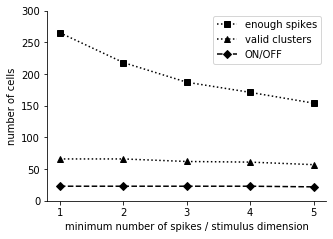

In [12]:
plt.figure(figsize=(5,3.5))

spike_per_dims = [1, 2, 3, 4, 5]
plt.plot(spike_per_dims, [len(spd1), len(spd2), len(spd3), len(spd4), len(spd5)], 'ks:')
plt.plot(spike_per_dims, [count_thresholded(spd1), count_thresholded(spd2), count_thresholded(spd3), count_thresholded(spd4), count_thresholded(spd5)], 'k^:')
plt.plot(spike_per_dims, [len(channel_names_spd1), len(channel_names_spd2), len(channel_names_spd3), len(channel_names_spd4), len(channel_names_spd5)], 'kD--')
plt.xticks(spike_per_dims)

plt.xlabel('minimum number of spikes / stimulus dimension')
plt.ylabel('number of cells')

legends = ["enough spikes", "valid clusters", "ON/OFF"]
# , label="more than minimum number of spikes")
# , label="more than minimum number of spikes")
# , label="ON/OFF"
plt.legend(legends, loc="upper right")

# YLIM=plt.ylim()
# plt.ylim(0, YLIM[1])
plt.ylim(0,300)

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("figure/number_of_cells_vs_spd.pdf")

[56 48 43 39 32]
23 171
5 39
5 56
5 48
5 43
5 39
4 32


<BarContainer object of 5 artists>

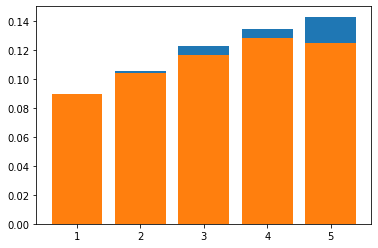

In [50]:
# re-plot with ratios

# ON/OFF / try cells
num_on_off = np.array([len(channel_names_spd1), len(channel_names_spd2), len(channel_names_spd3), len(channel_names_spd4), len(channel_names_spd5)])
num_tried =  np.array([len(spd1), len(spd2), len(spd3), len(spd4), len(spd5)])

plt.bar(spike_per_dims, num_on_off / num_tried)

# count unknowns
num_unknowns = np.array([np.sum(spd1.cell_type=="unknown"), np.sum(spd2.cell_type=="unknown"), np.sum(spd3.cell_type=="unknown"), np.sum(spd4.cell_type=="unknown"), np.sum(spd5.cell_type=="unknown")])
print(num_unknowns)

# count ON/OFF & unknown & 

def calc_ratio_of_on_off(df, base_col_name=None):
    if base_col_name is not None:
        base_idx = df[base_col_name]=="unknown"
        df = df.loc[base_idx]
        
#         print(len(df))

    idx_on_off = df["cell_type_combined"] == "ON/OFF"
    
    print(np.sum(idx_on_off), len(df))
    return np.sum(idx_on_off) / len(df)
    
    
calc_ratio_of_on_off(spd4)
calc_ratio_of_on_off(spd4, "cell_type")


ratio_of_on_off_among_unknown = [calc_ratio_of_on_off(spd1, "cell_type"),
                                 calc_ratio_of_on_off(spd2, "cell_type"),
                                 calc_ratio_of_on_off(spd3, "cell_type"),
                                 calc_ratio_of_on_off(spd4, "cell_type"),
                                 calc_ratio_of_on_off(spd5, "cell_type")]
# num_on_off_and_unknowns = np.array([np.sum(spd1.cell_type_combined=="ON/OFF" and spd1.cell_type=="unknown"), 
#                                     np.sum(spd2.cell_type=="unknown"), np.sum(spd3.cell_type=="unknown"), np.sum(spd4.cell_type=="unknown"), np.sum(spd5.cell_type=="unknown")])
# print(num_on_off_and_unknowns)



spike_per_dims = [1, 2, 3, 4, 5]


plt.bar(spike_per_dims, ratio_of_on_off_among_unknown)


# plt.bar(spike_per_dims, )

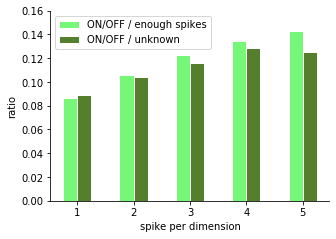

In [54]:
def bar_group(xs, bars1, bars2, labels=None, xlabel=None, barWidth = 0.25):
    """
    code from https://python-graph-gallery.com/11-grouped-barplot/
    """

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, color='#77f777', width=barWidth, edgecolor='white')
    plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white')

    # Add xticks on the middle of the group bars
    plt.xticks([r + barWidth/2 for r in range(len(bars1))], xs)
    if xlabel is not None:
        plt.xlabel(xlabel)        

    # Create legend & Show graphic
    if labels is not None:
        plt.legend(labels)
        
    # remove top & right box
    # https://stackoverflow.com/a/28720127
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.figure(figsize=(5,3.5))
bar_group(spike_per_dims, num_on_off / num_tried, ratio_of_on_off_among_unknown, xlabel='spike per dimension')
plt.ylabel('ratio')
plt.legend(["ON/OFF / enough spikes", "ON/OFF / unknown"])


plt.ylim(0, 0.16)

plt.savefig("figure/ratio_ON_OFF.pdf")

In [15]:
num_on_off / num_unknowns

array([0.41071429, 0.47916667, 0.53488372, 0.58974359, 0.6875    ])

In [16]:
spd4.cell_type.value_counts()

OFF        84
ON         48
unknown    39
Name: cell_type, dtype: int64

In [17]:
spd5.cell_type.value_counts()

OFF        78
ON         44
unknown    32
Name: cell_type, dtype: int64

In [18]:
22/32

0.6875

In [19]:
idx_on = spd2.groupby("cell_type_combined").groups['ON']
idx_off = spd2.groupby("cell_type_combined").groups['OFF']
idx_on_off = spd2.groupby("cell_type_combined").groups['ON/OFF']
idx_unknown = spd2.groupby("cell_type_combined").groups['unknown']

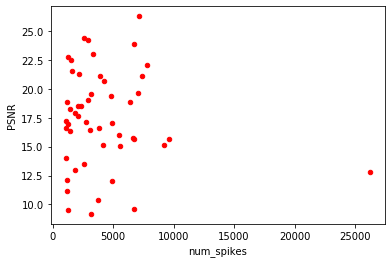

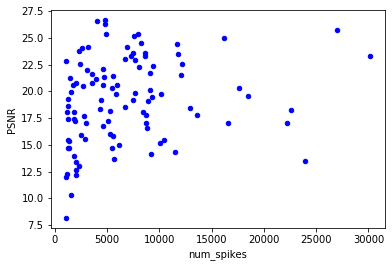

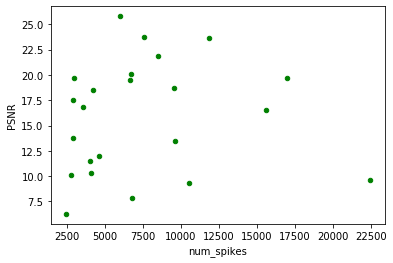

In [20]:

spd2.loc[idx_on].plot.scatter("num_spikes", "PSNR", c="r")
spd2.loc[idx_off].plot.scatter("num_spikes", "PSNR", c="b")
spd2.loc[idx_on_off].plot.scatter("num_spikes", "PSNR", c="g")

## stats

In [26]:
spd4["cell_type"].value_counts()

OFF        84
ON         48
unknown    39
Name: cell_type, dtype: int64

In [27]:
spd4["cell_type"].value_counts().sum()

171

In [33]:
spd4["cell_type"].value_counts() / spd4["cell_type"].value_counts().sum()

OFF        0.491228
ON         0.280702
unknown    0.228070
Name: cell_type, dtype: float64

In [29]:
spd4["cell_type_combined"].value_counts()

OFF        79
ON         35
unknown    34
ON/OFF     23
Name: cell_type_combined, dtype: int64

In [35]:
spd4["cell_type_combined"].value_counts() / spd4["cell_type_combined"].value_counts().sum()

OFF        0.461988
ON         0.204678
unknown    0.198830
ON/OFF     0.134503
Name: cell_type_combined, dtype: float64

In [24]:
spd4.groupby("cell_type")["cell_type_combined"].value_counts()

cell_type  cell_type_combined
OFF        OFF                   79
           ON/OFF                 5
ON         ON                    35
           ON/OFF                13
unknown    unknown               34
           ON/OFF                 5
Name: cell_type_combined, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(spd4["cell_type_combined"], spd4["cell_type"], labels=["ON", "OFF", "ON/OFF", "unknown"])

array([[35,  0,  0,  0],
       [ 0, 79,  0,  0],
       [13,  5,  0,  5],
       [ 0,  0,  0, 34]])

In [32]:
confusion_matrix(spd4["cell_type"], spd4["cell_type_combined"], labels=["ON", "OFF", "ON/OFF", "unknown"])

array([[35,  0, 13,  0],
       [ 0, 79,  5,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  5, 34]])